In [1]:
import math
import random
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
color = sns.color_palette("muted")
np.random.shuffle(color)
sns.set(style="whitegrid", context="paper", palette=color)

import matplotlib as mpl
mpl.rcParams.update({
    "text.usetex": True,          # route all text through LaTeX
    "pgf.texsystem": "xelatex",  
    "pgf.rcfonts": False,         # do not override with mpl fonts
    "font.family": "serif",
    "text.latex.preamble": r"""
\usepackage{libertinust1math}
""",
})

[(0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686)]

# 1. Distribución Uniforme $(a,b)$

Sea **$U\sim\mathrm{Unif}(0,1)$**. Si $X\sim\mathrm{Unif}(a,b)$, entonces su funcion de distribucion acumulada es:

$$
F_X(x)=\frac{x-a}{b-a}\,\mathbf{1}_{[a,b]}(x) + \mathbf{1}_{(b,\infty)}(x)
$$

Encontrando la inversa:

$$
\begin{aligned}
F_X(x)=u &\quad\iff\quad \frac{x-a}{b-a}=u,\\
         &\quad\iff\quad x-a=(b-a)\,u,\\
         &\quad\iff\quad x=a+(b-a)\,u.
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=a+(b-a)\,u.
$$


# 2. Distribución Discreta

## a) Grafica de $f_X(x)$

$$
f_X(x)=\mathbb P(X = x)=
\begin{cases}
0.4,& x =1,\\
0.3,& x =2,\\
0.2,& x =3,\\
0.1,& x =4,\\
0,& \text{en otro caso}
\end{cases}
$$

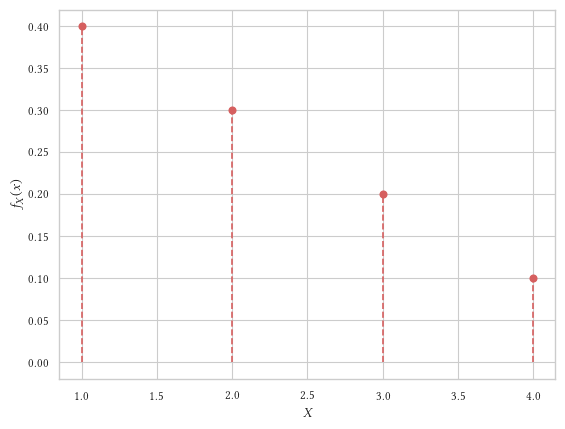

In [3]:
x_vals = [1, 2, 3, 4]
pmf = [0.4, 0.3, 0.2, 0.1]

plt.vlines(x_vals, 0, pmf, linestyles='--')
plt.plot(x_vals, pmf, 'o')
plt.xlabel('$X$')
plt.ylabel('$f_X(x)$')
plt.show()

## b) Grafica de $F_X(x)$


$$
F_X(x)=\mathbb P(X\le x)=
\begin{cases}
0,& x<1,\\
0.4,& 1\le x<2,\\
0.7,& 2\le x<3,\\
0.9,& 3\le x<4,\\
1,& x\ge 4.
\end{cases}
$$


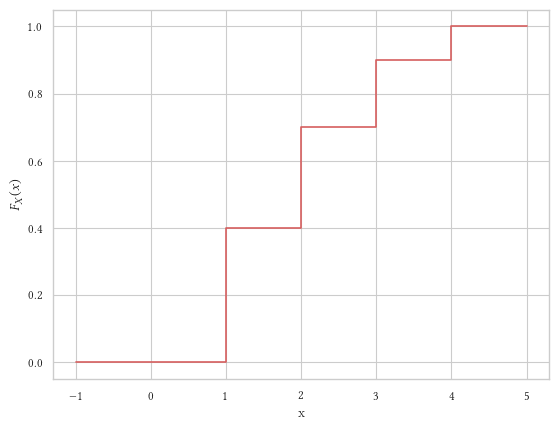

In [4]:
x_cdf = [-1, 1, 2, 3, 4, 5]
F_cdf = [0, 0.4, 0.7, 0.9, 1, 1]

plt.step(x_cdf, F_cdf, where='post')
plt.xlabel('x')
plt.ylabel('$F_X(x)$')
plt.show()

## c) Grafica de $F^{-1}_X(u)$

Sea **$U\sim\mathrm{Unif}(0,1)$**.


$$
\begin{aligned}
F_X(x)=u 
&\;\iff\; u\in(0,0.4] \;\Rightarrow\; x=1,\\
&\;\iff\; u\in(0.4,0.7] \;\Rightarrow\; x=2,\\
&\;\iff\; u\in(0.7,0.9] \;\Rightarrow\; x=3,\\
&\;\iff\; u\in(0.9,1] \;\Rightarrow\; x=4.
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=
\begin{cases}
1,& 0<u\le 0.4,\\
2,& 0.4<u\le 0.7,\\
3,& 0.7<u\le 0.9,\\
4,& 0.9<u\le 1.
\end{cases}
$$


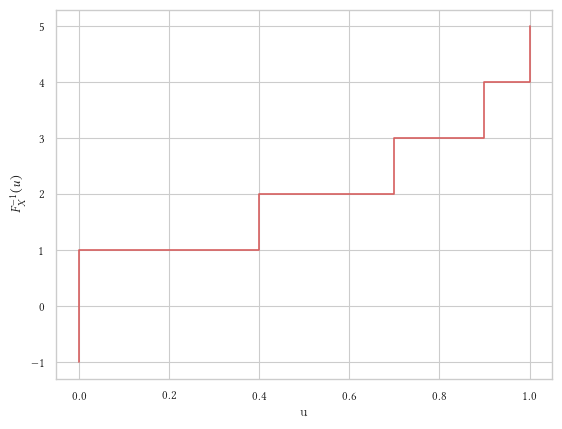

In [5]:
u_vals = [0, 0, 0.4, 0.7, 0.9, 1]
F_inv_vals = [-1, 1, 2, 3, 4, 5]

plt.step(u_vals, F_inv_vals, where="post")
plt.xlabel("u")
plt.ylabel("$F_X^{-1}(u)$")
plt.show()

## d) Programa

In [6]:
def F_inv(u):
    if u <= 0.4:
        return 1
    elif u <= 0.7:
        return 2
    elif u <= 0.9:
        return 3
    else:
        return 4

u_samples = np.random.uniform(0, 1, 500)
x_samples = [F_inv(u) for u in u_samples]

## e) Histograma

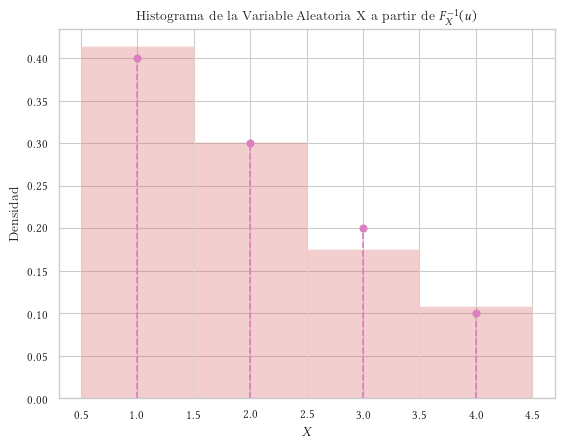

In [7]:
plt.hist(x_samples, bins=np.arange(0.5, 5.5, 1), density=True, alpha=0.3)
plt.vlines(x_vals, 0, pmf, linestyles='--', color=color[1])
plt.plot(x_vals, pmf, 'o', color=color[1])
plt.xlabel("$X$")
plt.ylabel("Densidad")
plt.title("Histograma de la Variable Aleatoria X a partir de $F_X^{-1}(u)$")
plt.show()

# 3. Exponencial $\mathrm{Exp}(\lambda)$

Sea **$U\sim\mathrm{Unif}(0,1)$**. Si $X\sim\mathrm{Exp}(\lambda)$, entonces su funcion de distribucion acumulada es:

$$
F_X(x)=\bigl(1-e^{-\lambda x}\bigr)\,\mathbf{1}_{[0,\infty)}(x)
$$

Encontrando la inversa:

$$
\begin{aligned}
F_X(x)=u &\;\iff\; 1-e^{-\lambda x}=u,\\
         &\;\iff\; e^{-\lambda x}=1-u,\\
         &\;\iff\; -\lambda x=\ln(1-u),\\
         &\;\iff\; x=-\frac{1}{\lambda}\,\ln(1-u).
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=-\frac{1}{\lambda}\,\ln(1-u).
$$

Por lo tanto, con $U\sim\mathrm{Unif}(0,1)$,

$$
X=F_X^{-1}(U)=-\frac{1}{\lambda}\ln(1-U)\sim\mathrm{Exp}(\lambda).
$$


# 4. Weibull $(r,\lambda)$

Sea **$U\sim\mathrm{Unif}(0,1)$**, con $r>0$ y $\lambda>0$. Si $X\sim\mathrm{Weibull}(r,\lambda)$, entonces su funcion de distribucion acumulada es:

$$
F_X(x)=\bigl(1-e^{-(\lambda x)^r}\bigr)\,\mathbf{1}_{[0,\infty)}(x)
$$

Encontrando la inversa:

$$
\begin{aligned}
F_X(x)=u &\;\iff\; 1-e^{-(\lambda x)^r}=u,\\
         &\;\iff\; e^{-(\lambda x)^r}=1-u,\\
         &\;\iff\; -(\lambda x)^r=\ln(1-u),\\
         &\;\iff\; (\lambda x)^r=-\ln(1-u),\\
         &\;\iff\; x=\frac{1}{\lambda}\,\bigl[-\ln(1-u)\bigr]^{1/r}.
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=\frac{1}{\lambda}\,\bigl[-\ln(1-u)\bigr]^{1/r}.
$$

Por lo tanto, con $U\sim\mathrm{Unif}(0,1)$:

$$
X=F_X^{-1}(U)=\frac{1}{\lambda}\,\bigl[-\ln(1-U)\bigr]^{1/r}\sim\mathrm{Weibull}(r,\lambda).
$$


# 5. Cauchy $(a,b)$

Sea **$U\sim\mathrm{Unif}(0,1)$**. Si $X\sim\mathrm{Cauchy}(a,b)$, entonces su funcion de distribucion acumulada es:

$$
F_X(x)=\frac{1}{\pi}\arctan\!\Big(\frac{x-a}{b}\Big)+\frac{1}{2},\qquad x\in\mathbb{R},\; b>0.
$$

Encontrando la inversa:

$$
\begin{aligned}
F_X(x)=u 
&\;\iff\; \frac{1}{\pi}\arctan\!\Big(\frac{x-a}{b}\Big)+\frac{1}{2}=u,\\
&\;\iff\; \arctan\!\Big(\frac{x-a}{b}\Big)=\pi\!\left(u-\tfrac{1}{2}\right),\\
&\;\iff\; \frac{x-a}{b}=\tan\!\big(\pi(u-\tfrac{1}{2})\big),\\
&\;\iff\; x=a+b\,\tan\!\big(\pi(u-\tfrac{1}{2})\big).
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=a+b\,\tan\!\big(\pi(u-\tfrac{1}{2})\big).
$$

Por lo tanto, $X=F_X^{-1}(U)=a+b\,\tan(\pi(U-\tfrac{1}{2}))\sim\mathrm{Cauchy}(a,b)$.


# 6. Pareto I $(a,b)$

Sea **$U\sim\mathrm{Unif}(0,1)$**, con $a>0$ y $b>0$. Si $X\sim\mathrm{Pareto\ I}(a,b)$, entonces su funcion de distribucion acumulada es:

$$
F_X(x)=\bigl(1-(b/x)^a\bigr)\,\mathbf{1}_{[b,\infty)}(x)
$$

Encontrando la inversa:

$$
\begin{aligned}
F_X(x)=u &\;\iff\; 1-\left(\frac{b}{x}\right)^a=u,\\
         &\;\iff\; \left(\frac{b}{x}\right)^a=1-u,\\
         &\;\iff\; \frac{b}{x}=(1-u)^{1/a},\\
         &\;\iff\; x=b\,(1-u)^{-1/a}.
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=b\,(1-u)^{-1/a}.
$$

Por lo tanto,

$$
X=F_X^{-1}(U)=b\,(1-U)^{-1/a}\sim\mathrm{Pareto\ I}(a,b).
$$


# 7. Mínimo $X_{(1)}=\min\{X_1,\dots,X_n\}$ 

Sea **$U\sim\mathrm{Unif}(0,1)$** y $X_{(1)}:=\min\{X_1,\dots,X_n\}$ con $X_i$ i.i.d. de CDF $F$.

$$
F_{X_{(1)}}(x)=\mathbb P(X_{(1)}\le x)
=1-\mathbb P(X_1>x,\dots,X_n>x)
=1-\bigl(1-F(x)\bigr)^n.
$$

**Encontrando la inversa:**

$$
\begin{aligned}
F_{X_{(1)}}(x)=u 
&\;\iff\; 1-\bigl(1-F(x)\bigr)^n=u,\\
&\;\iff\; \bigl(1-F(x)\bigr)^n=1-u,\\
&\;\iff\; 1-F(x)=(1-u)^{1/n},\\
&\;\iff\; F(x)=1-(1-u)^{1/n},\\
&\;\iff\; x=F^{-1}\!\bigl(1-(1-u)^{1/n}\bigr).
\end{aligned}
$$

Entonces:

$$
F_{X_{(1)}}^{-1}(u)=F^{-1}\!\bigl(1-(1-u)^{1/n}\bigr),\quad 0<u<1.
$$

# 8. Mixta $X=\min\{Y,M\}$ con $Y\sim\mathrm{Exp}(\lambda)$

Sea con $U\sim\mathrm{Unif}(0,1)$,

$$
X=F_X^{-1}(U)=-\frac{1}{\lambda}\ln(1-U)\sim\mathrm{Exp}(\lambda).
$$

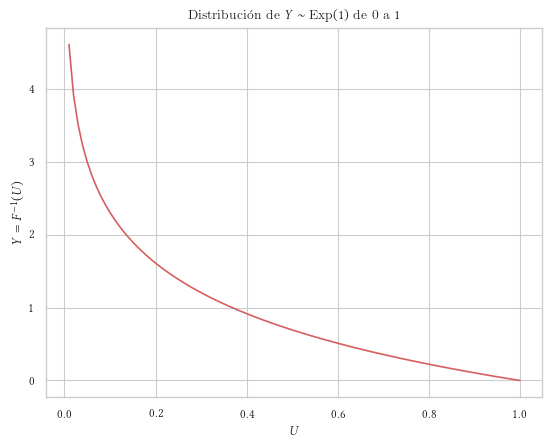

In [169]:
def exp01(lamb: int, U: float) -> float:
    return -np.log(U) / lamb

U = np.linspace(0.01, 1-1e-5, 100)
Y = exp01(1, U)

plt.plot(U, Y)
plt.xlabel("$U$")
plt.ylabel("$Y = F^{-1}(U)$")
plt.title("Distribución de $Y \\sim \\text{Exp}(1)$ de 0 a $1$")
plt.show()

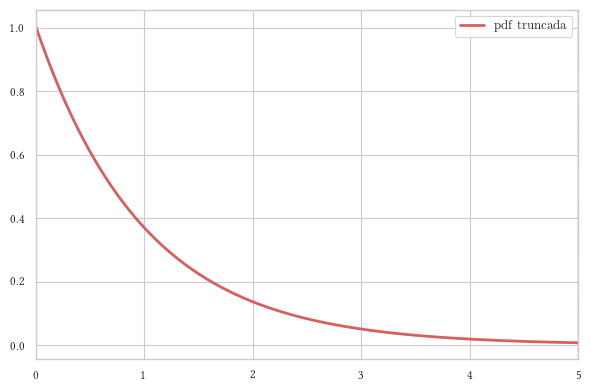

In [ ]:
def cdf_exp(lam, x):
    return 1.0 - np.exp(-lam * x)

def inv_exp(lam, u):
    return - np.log(u) / lam

def exp_ab(lam, a, b, n):
    Fa, Fb = cdf_exp(lam, a), cdf_exp(lam, b)
    U01 = np.random.rand(n)               # ~ Unif(0,1)
    Uab = Fa + U01 * (Fb - Fa)            # ~ Unif(Fa,Fb)
    return inv_exp(lam, Uab)              # Y = F^{-1}(U) ∈ [a,b]

# ejemplo
lam, a, b, n = 1.0, 0.0, 5.0, 50_000
Y = exp_ab(lam, a, b, n)

# PDF teórica truncada: f_tr(x)=λ e^{-λ x}/(F(b)-F(a)) en [a,b]
x = np.linspace(0, 5, 400)
Fa, Fb = cdf_exp(lam, a), cdf_exp(lam, b)
f_tr = np.where((x>=a)&(x<=b), lam*np.exp(-lam*x)/(Fb-Fa), 0.0)

plt.figure(figsize=(6,4))
plt.plot(x, f_tr, linewidth=2, label="pdf truncada")
plt.axvline(b, ls="--", lw=1)
plt.xlim(0,5)
plt.legend(); plt.tight_layout()


$$f_X(x)=
M\, \mathbf 1_{[0,M)}(x) +
\lambda e^{-\lambda x}\,\mathbf 1_{[M,\infty)}(x)$$

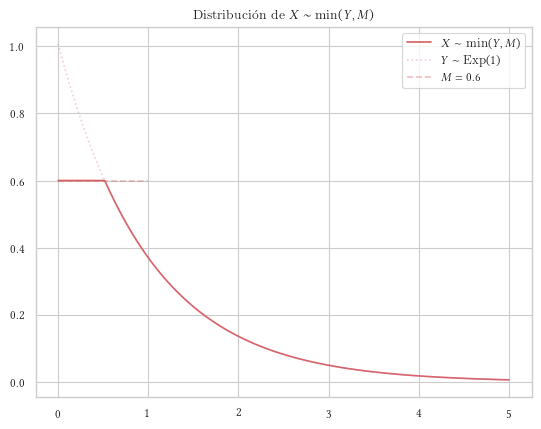

In [213]:
M = 0.6
Y = f_tr

# Ensure U and X have the same dimensions
U = np.linspace(0, 5, len(Y))
X = [min(y, M) for y in Y]



plt.plot(U, X, label=f'$X \\sim$ min$(Y, M)$')
plt.plot(U, Y, label='$Y \\sim \\text{Exp}(1)$', alpha=0.4, linestyle='dotted')
plt.hlines(M, 0, 1, linestyles='dashed', label=f'$M = {M}$', alpha=0.4)
plt.title("Distribución de $X \\sim \\text{min}(Y, M)$")
plt.legend()
plt.show()

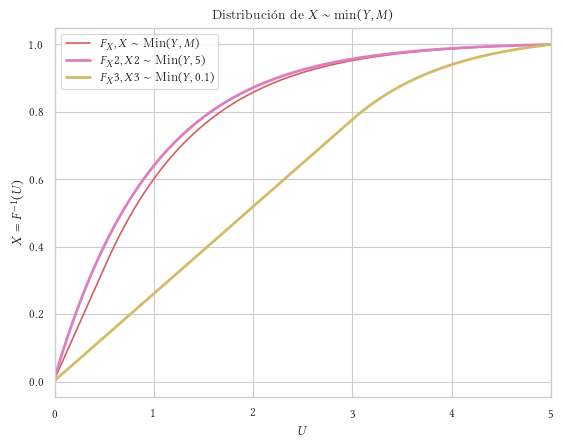

In [221]:
X2 = [min(y, 5) for y in Y]
X3 = [min(y, 0.05) for y in Y]

F_X = np.cumsum(X)/np.sum(X)
F_X2 = np.cumsum(X2)/np.sum(X2)
F_X3 = np.cumsum(X3)/np.sum(X3)

plt.plot(U, F_X, label=f'$F_X, X \sim$ Min$(Y, M)$')
plt.plot(U, F_X2, label=f'$F_X2, X2 \sim$ Min$(Y, 5)$', linewidth=2)
plt.plot(U, F_X3, label=f'$F_X3, X3 \sim$ Min$(Y, 0.1)$', linewidth=2)
plt.title("Distribución de $X \\sim \\text{min}(Y, M)$")
plt.xlabel("$U$")
plt.ylabel("$X = F^{-1}(U)$")
plt.legend()
plt.xlim(0,5)
plt.show()

## a) Grafica de $F_X(x)$

Sea $X=\min\{Y,M\}$ con $Y\sim\mathrm{Exp}(\lambda)$

Fórmulas para referencia:

$$
F_X(x)=\begin{cases}
0,&x<0\\
1-e^{-\lambda x},&0\le x<M\\
1,&x\ge M
\end{cases}
\quad
f_X(x)=\lambda e^{-\lambda x}\,\mathbf 1_{[0,M)}(x),\quad
\Pr[X=M]=e^{-\lambda M}.
$$

Gráfica lista. El histograma estima $f_X$ en $[0,M)$; la línea vertical marca $x=M$; el “spike” señala la masa $e^{-\lambda M}$. Cambia $\lambda$, $M$ o $N$ en el bloque superior del código si lo necesitas.


## b) Grafica de $F^{-1}_X(u)$

## c) $F_X(F^{-1}_X(u)) \geq u,$ para $u \in [0, 1]$.

## d) $F^{-1}_X(F_X(x)) \geq x,$ para $x$ tal que $F_X(x) \in [0, 1]$.

## e) Cómo generar valores con el método de la función inversa

# 9. Mixta $X=\max\{Y,M\}$ con $Y\sim\mathrm{Exp}(\lambda)$

## a) Grafica de $F_X(x)$

## b) Grafica de $F^{-1}_X(u)$

## c) $F_X(F^{-1}_X(u)) \geq u,$ para $u \in [0, 1]$.

## d) $F^{-1}_X(F_X(x)) \geq x,$ para $x$ tal que $F_X(x) \in [0, 1]$.

## e) Cómo generar valores con el método de la función inversa

Sea **$Y\sim\mathrm{Exp}(\lambda)$** y $M>0$. Defina $X=\max\{Y,M\}$.

**CDF**

$$
F_X(x)=\mathbb P(X\le x)=
\begin{cases}
0,& x<M,\\[4pt]
1-e^{-\lambda x},& x\ge M,
\end{cases}
$$

con salto en $x=M$ de tamaño $1-e^{-\lambda M}$.

**Inversa (cuantil generalizado $F_X^{-1}(u)=\inf\{x:F_X(x)\ge u\}$)**


Sea **$U\sim\mathrm{Unif}(0,1)$**.

$$
F_X^{-1}(u)=
\begin{cases}
M,& 0<u\le 1-e^{-\lambda M},\\[6pt]
-\dfrac{1}{\lambda}\ln(1-u),& 1-e^{-\lambda M}<u<1,
\end{cases}
$$

y además $F_X^{-1}(0^+)=M$ y $F_X^{-1}(1)=+\infty$.

> Para muestrear: si $U\le 1-e^{-\lambda M}$ devuelve $M$; en caso contrario devuelve $-\frac1\lambda\ln(1-U)$.


c) **Probar $F(F^{-1}(u))\ge u$, $0<u<1$.**
Defina el cuantil generalizado $F^{-1}(u):=\inf\{x:\,F(x)\ge u\}$. Sea $S_u=\{x:\,F(x)\ge u\}$. Para todo $\varepsilon>0$ existe $x_\varepsilon\in S_u$ con $x_\varepsilon\le F^{-1}(u)+\varepsilon$. Entonces

$$
F\big(F^{-1}(u)+\varepsilon\big)\ \ge\ u.
$$

Por derecha-continuidad,

$$
F\!\big(F^{-1}(u)\big)=\lim_{\varepsilon\downarrow0}F\big(F^{-1}(u)+\varepsilon\big)\ \ge\ u.
$$

**Verificación para $X=\max\{Y,M\}$.** Con $p_0:=1-e^{-\lambda M}$,

$$
F^{-1}(u)=
\begin{cases}
M,& 0<u\le p_0,\\
-\frac1\lambda\ln(1-u),& p_0<u<1.
\end{cases}
$$

Luego $F(F^{-1}(u))=F(M)=p_0\ge u$ si $u\le p_0$, y $F(-\tfrac1\lambda\ln(1-u))=u$ si $u>p_0$.


d) **Probar $F^{-1}(F(x))\le x$ cuando $0<F(x)<1$.**
Tome $u=F(x)$. El conjunto $S_u=\{t:\,F(t)\ge u\}$ contiene a $x$ (trivialmente $F(x)\ge u$). Por lo tanto

$$
F^{-1}(F(x))=\inf S_u\ \le\ x.
$$

La igualdad se da cuando $F$ es continua en $x$.

**Verificación para $X=\max\{Y,M\}$.** Si $x>M$,

$$
F^{-1}(F(x))=-\frac1\lambda\ln\!\big(1-(1-e^{-\lambda x})\big)=x.
$$

Si $x=M$, $F^{-1}(F(M))=F^{-1}(p_0)=M=x$.



e) **Generación por transformada inversa.**
Con $p_0:=1-e^{-\lambda M}$ y $U\sim\mathrm{Unif}(0,1)$:

$$
X=
\begin{cases}
M, & U\le p_0,\\[4pt]
-\dfrac1\lambda\ln(1-U), & U>p_0.
\end{cases}
$$

Es todo.


# 10. Variable con CDF por tramos

## a) Grafica de $F_{X}(x)$


$$
F_X(x)=
\begin{cases}
0,& x\le -2,\\[2pt]
\dfrac{x+2}{2},& -2<x<-1,\\[8pt]
\dfrac12,& -1\le x<1,\\[6pt]
\dfrac{x}{2},& 1\le x<2,\\[6pt]
1,& x\ge 2.
\end{cases}
$$


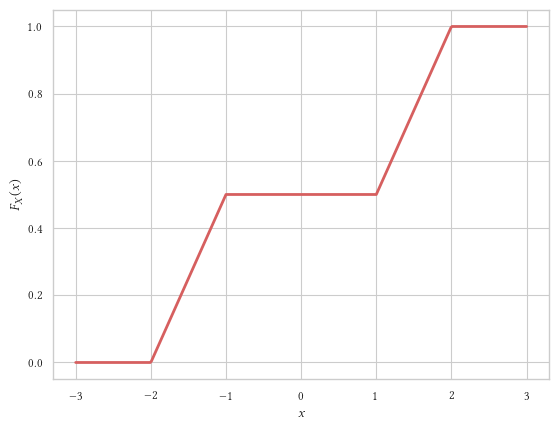

In [ ]:
def F(x):
    if x <= -2:
        return 0
    elif -2 < x < -1:
        return (x + 2) / 2
    elif -1 <= x < 1:
        return 0.5
    elif 1 <= x < 2:
        return x / 2
    elif x >= 2:
        return 1

x = np.linspace(-3, 3, 400)
Fx = [F(xi) for xi in x]

plt.plot(x, Fx, lw=2, color=color[0])
plt.xlabel('$x$')
plt.ylabel('$F_X(x)$')
plt.show()

## b) Grafica de $F_{X}^{-1}(u)$

Sea **$U\sim\mathrm{Unif}(0,1)$**.

**Encontrando la inversa:**

* Para $x\le -2$, $u\in\{0\}$
  $$
  F_X^{-1}(0)=-2
  $$.


* Para $-2<x<-1$, $u\in(0,\tfrac12)$:

  $$
  \begin{aligned}
  F_X(x)=u &\iff \frac{x+2}{2}=u,\\
           &\iff x=2u-2.
  \end{aligned}
  $$
* Para $-1\le x<1$, $u\in\{\tfrac12\}$: 

  $$
  F_X^{-1}(\tfrac12)=-1
  $$.
  
  
* Para $1\le x<2$, $u\in(\tfrac12,1)$:

  $$
  \begin{aligned}
  F_X(x)=u &\iff \frac{x}{2}=u,\\
           &\iff x=2u.
  \end{aligned}
  $$
* Para $x\ge 2$, $u\in\{1\}$: 

$$
F_X^{-1}(1)=2
$$.

**Entonces:**

$$
F_X^{-1}(u)=
\begin{cases}
-2,& u=0,\\[4pt]
2u-2,& 0<u<\tfrac12,\\[4pt]
-1,& u=\tfrac12,\\[4pt]
2u,& \tfrac12<u<1,\\[4pt]
2,& u=1.
\end{cases}
$$


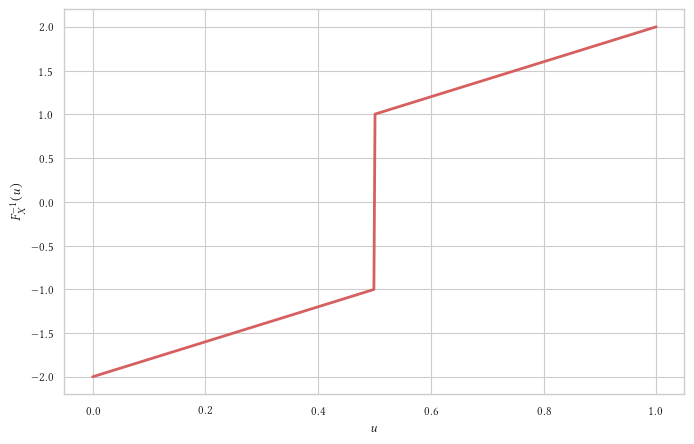

In [ ]:
def F_inv_func(u):
    if u == 0:
        return -2
    elif 0 < u < 0.5:
        return 2 * u - 2
    elif u == 0.5:
        return -1
    elif 0.5 < u < 1:
        return 2 * u
    elif u == 1:
        return 2

u = np.linspace(0, 1, 500)
F_inv = [F_inv_func(val) for val in u]

plt.figure(figsize=(8, 5))
plt.plot(u, F_inv, color=color[0], lw=2)
plt.xlabel('$u$')
plt.ylabel('$F_X^{-1}(u)$')
plt.show()

## c) $F_{X}(F^{-1}_X(u)) \geq u,$ para $u \in [0,1]$



Sea $x(u)=F_X^{-1}(u)$.

**1) $u=0$:**
$x(0)=-2$.
$F_X(x(0))=F_X(-2)=0=u$.

**2) $0<u<\tfrac12$:**
$x(u)=2u-2\in(-2,-1)$.
$F_X(x(u))=\dfrac{x(u)+2}{2}=\dfrac{2u-2+2}{2}=u$.

**3) $u=\tfrac12$:**
$x(\tfrac12)=-1$.
$F_X(x(\tfrac12))=F_X(-1)=\tfrac12=u$.

**4) $\tfrac12<u<1$:**
$x(u)=2u\in(1,2)$.
$F_X(x(u))=\dfrac{x(u)}{2}=\dfrac{2u}{2}=u$.

**5) $u=1$:**
$x(1)=2$.
$F_X(x(1))=F_X(2)=1=u$.

Conclusión:

$$
F_X\!\big(F_X^{-1}(u)\big)=u\quad\text{para todo }u\in[0,1],
$$

luego, en particular, $F_X(F_X^{-1}(u))\le u$ es cierto porque hay igualdad.


* En este ejemplo ya probamos **igualdad punto a punto**, así que el enunciado más débil $F_X(F_X^{-1}(u))\le u$ es inmediato.

* Contexto general: con la **pseudoinversa izquierda**

  $$
  F_X^{-1}(u)=\inf\{x:\ F_X(x)\ge u\},
  $$

  la monotonía y continuidad por la derecha de $F_X$ garantizan siempre

  $$
  F_X\!\big(F_X^{-1}(u)\big)\ \ge\ u.
  $$

  Si en cambio se define la **pseudoinversa derecha**

  $$
  \tilde F^{-1}(u)=\sup\{x:\ F_X(x)\le u\},
  $$

  entonces siempre

  $$
  F_X\!\big(\tilde F^{-1}(u)\big)\ \le\ u.
  $$

  En nuestra $F_X$ ambas convenciones dan **igualdad** en todos los $u$ relevantes, incluso en la meseta $F_X\equiv \tfrac12$, porque cualquier elección $x\in[-1,1]$ satisface $F_X(x)=\tfrac12$.


## d) $F_{X}^{-1}(F_X(x)) \leq x,$ para $x$ tal que $F_X(x) \in (0, 1)$.

Se cumple: $F_X^{-1}(F_X(x))\le x$ para todo $x$ con $F_X(x)\in(0,1)$.

**Prueba general (una línea).**
Por definición $F^{-1}(u)=\inf\{y:\,F(y)\ge u\}$. Tomando $u=F(x)$, se tiene $x\in\{y:\,F(y)\ge F(x)\}$. Por lo tanto $F^{-1}(F(x))=\inf(\cdot)\le x$.

**Chequeo caso a caso en tu $F_X$.**

* $x\in(-2,-1)$:
  $F_X(x)=\dfrac{x+2}{2}\in(0,\tfrac12)$.
  Entonces $F_X^{-1}(F_X(x))=2\cdot\dfrac{x+2}{2}-2=x$. Igualdad.

* $x\in[-1,1)$:
  $F_X(x)=\tfrac12$.
  Con la convención dada, $F_X^{-1}(\tfrac12)=-1$.
  Luego $F_X^{-1}(F_X(x))=-1\le x$, con igualdad solo en $x=-1$.

* $x\in[1,2)$:
  $F_X(x)=\dfrac{x}{2}\in[\tfrac12,1)$.
  Si $x\in(1,2)$, $F_X^{-1}(F_X(x))=2\cdot\dfrac{x}{2}=x$ (igualdad).
  En $x=1$, $F_X(1)=\tfrac12$ y $F_X^{-1}(\tfrac12)=-1\le 1$.

Concluye $F_X^{-1}(F_X(x))\le x$ en todos los $x$ tales que $F_X(x)\in(0,1)$; hay igualdad salvo en la meseta donde la elección del borde izquierdo impone $-1$.


## e) Cómo generar valores con el método de la función inversa

1. Generar $U\sim\mathrm{Unif}(0,1)$.

2. Definir la inversa

$$
F^{-1}(u)=\inf\{x:\ F(x)\ge u\}.
$$

3. Asignar $X=F^{-1}(U)$.

2. Entonces:

$$
\mathbb{P}(X\le x)=\mathbb{P}\!\big(F^{-1}(U)\le x\big)=\mathbb{P}\!\big(U\le F(x)\big)=F(x).
$$


## f) $f_{X}(x)$.


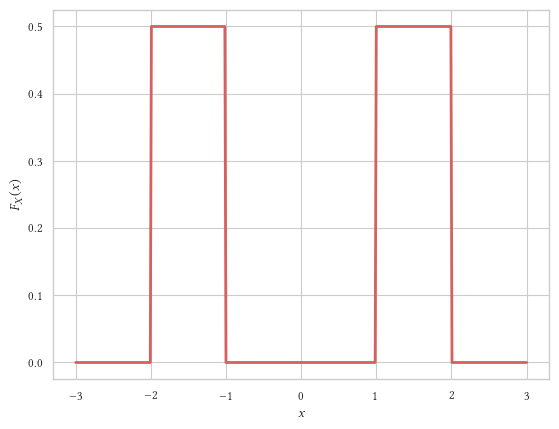

In [ ]:
def f(x):
    if x < -2:
        return 0
    elif  -2 < x < -1:
        return 1/2
    elif -1 <= x < 1:
        return 0
    elif 1 <= x < 2:
        return 1/2
    else:
        return 0
    

x = np.linspace(-3, 3, 400)
fx = [f(xi) for xi in x]

plt.plot(x, fx, lw=2, color=color[0])
plt.xlabel('$x$')
plt.ylabel('$F_X(x)$')
plt.show()

## g) Programa

Está en el inciso anterior.

## h) $\mathbb{E}[X] = 0$.

La densidad es

$$
f(x)=\tfrac12\,\mathbf 1_{(-2,-1)}(x)+\tfrac12\,\mathbf 1_{(1,2)}(x),
$$


**Simetría.**

Es simétrica, $f(x)=f(-x)$. Entonces

$$
\mathbb E[X]=\int_{\mathbb R} x\,f(x)\,dx
=\int_{-\infty}^{\infty} x\,f(x)\,dx
=-\int_{-\infty}^{\infty} x\,f(x)\,dx
$$

por el cambio $x\mapsto -x$ y la simetría, así $\mathbb E[X]=0$.

**Cálculo.**

$$
\mathbb E[X]=\frac12\!\int_{-2}^{-1}\!x\,dx+\frac12\!\int_{1}^{2}\!x\,dx
=\frac12\Big[\tfrac{x^{2}}{2}\Big]_{-2}^{-1}+\frac12\Big[\tfrac{x^{2}}{2}\Big]_{1}^{2}
=\frac12\Big(\tfrac12-2\Big)+\frac12\Big(2-\tfrac12\Big)=0.
$$

**Mezcla.**

$X\sim \tfrac12\,\mathrm{Unif}(-2,-1)+\tfrac12\,\mathrm{Unif}(1,2)$.

$\mathbb E[\mathrm{Unif}(-2,-1)]=-1.5$, $\mathbb E[\mathrm{Unif}(1,2)]=1.5$.

$\mathbb E[X]=\tfrac12(-1.5)+\tfrac12(1.5)=0$.


## i) $\bar{x} \approx 0$.

In [57]:
x = np.random.uniform(-10000, 10000, 1000)
fx = [f(xi) for xi in x]
np.mean(fx)  

np.float64(0.0)

# 11. Bernoulli $(p)$ desde $U(0,1)$

Sea **$U\sim\mathrm{Unif}(0,1)$** y $0<p<1$. Defina

$$
X=\mathbf 1_{(0,p]}(U)=
\begin{cases}
1,& U\le p,\\
0,& U>p.
\end{cases}
$$

$$
\mathbb P(X=1)=\mathbb P(U\le p)=p,\qquad
\mathbb P(X=0)=\mathbb P(U>p)=1-p,
$$

usando que $\mathbb P(U=p)=0$. Por tanto $X\sim \mathrm{Bernoulli}(p)$.

# 12. Variable aleatoria discreta

## a) Grafica de $f_X(x)$

$$
f_X(x)=
\begin{cases}
0.3& x=1,\\
0.5,& x=2,\\
0.2,& x=3,\\
0,& \text{en otro caso.}
\end{cases}
$$

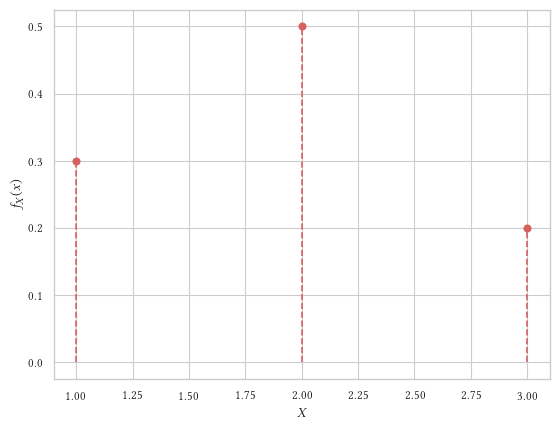

In [11]:
x_vals = [1, 2, 3]
pmf = [0.3, 0.5, 0.2]

plt.vlines(x_vals, 0, pmf, linestyle='--')
plt.plot(x_vals, pmf, 'o')
plt.xlabel('$X$')
plt.ylabel('$f_X(x)$')
plt.show()

## b) Grafica de $F_X(x)$

$$
F_X(x)=\mathbb P(X\le x)=
\begin{cases}
0,& x<1,\\
0.3,& 1\le x<2,\\
0.8,& 2\le x<3,\\
1,& x\ge 3.
\end{cases}
$$

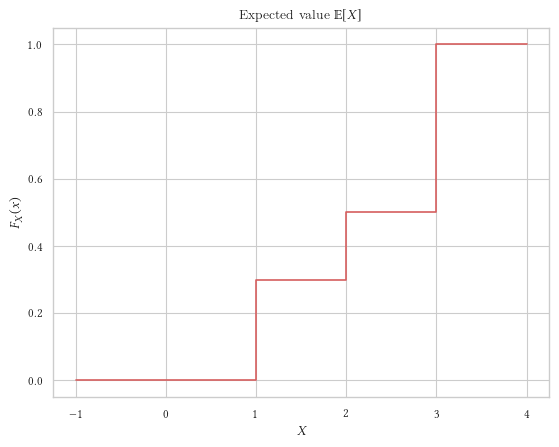

In [12]:
x_cdf = [-1, 1, 2, 3, 4]
F_cdf = [0, 0.3, 0.5, 1, 1]

plt.step(x_cdf, F_cdf, where='post', linestyle='-')
plt.xlabel('$X$')
plt.ylabel('$F_X(x)$')
plt.title('Expected value $\mathbb{E}[X]$')
plt.show()


## c) Grafica de $F^{-1}_X(u)$




Sea **$U\sim\mathrm{Unif}(0,1)$**.

$$
\begin{aligned}
F_X(x)=u &\;\iff\; u\in(0,0.3]\ \Rightarrow\ x=1,\\
         &\;\iff\; u\in(0.3,0.8]\ \Rightarrow\ x=2,\\
         &\;\iff\; u\in(0.8,1]\ \Rightarrow\ x=3.
\end{aligned}
$$

Entonces:

$$
F_X^{-1}(u)=
\begin{cases}
1,& 0<u\le 0.3,\\
2,& 0.3<u\le 0.8,\\
3,& 0.8<u\le 1.
\end{cases}
$$


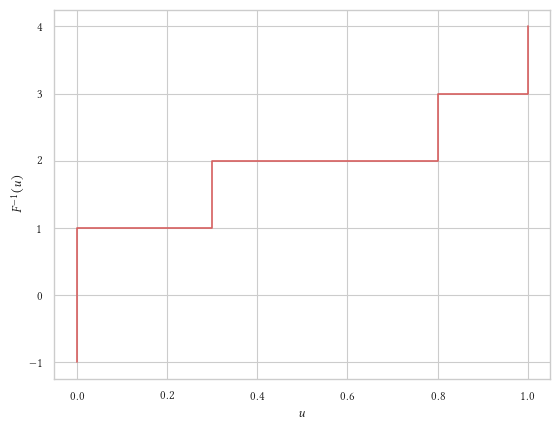

In [ ]:

u_vals = [0, 0, 0.3, 0.8, 1.0]
F_inv_values = [-1, 1, 2, 3, 4]

plt.step(u_vals, F_inv_values, where='post')
plt.xlabel('$u$')
plt.ylabel('$F^{-1}(u)$')
plt.show()


## d) Valor esperado $\mathbb E[X]$
$$
\mathbb E[X]=\sum_{x=1}^{3}x\cdot f_X(x)=1\cdot 0.3+2\cdot 0.5+3\cdot 0.2=1.9.
$$

## e) Varianza $\mathbb V[X]$
$$
\mathbb V[X]=\sum_{x=1}^{3}(x-\mathbb E[X])^2\cdot f_X(x)=
(1-1.9)^2\cdot 0.3+(2-1.9)^2\cdot 0.5+(3-1.9)^2\cdot 0.2=0.49.
$$

$$
\mathbb V[X] = \mathbb E[X^2] - (\mathbb E[X])^2 = 
0.3\cdot 1^2 + 0.5\cdot 2^2 + 0.2\cdot 3^2 - (1.9)^2 = 2.79 - (1.9)^2 = 0.49.
$$

## f) Programa

In [14]:
def F_inv(u):
    if 0.3 < u <= 0.8:
        return 2
    elif u <= 0.3:
        return 1
    else:
        return 3

## g) Histograma

In [15]:
u_samples = np.random.uniform(0, 1, 500)
x_samples = [F_inv(u) for u in u_samples]

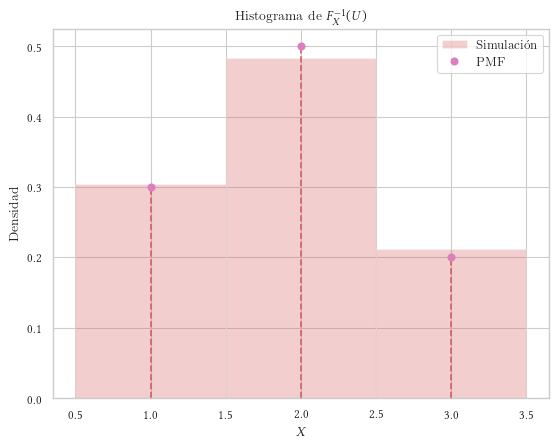

In [39]:
plt.hist(x_samples, bins=np.arange(0.5, 4.5, 1), density=True, alpha=0.3, label='Simulación')
plt.vlines(x_vals, 0, pmf, linestyle='--')
plt.plot(x_vals, pmf, 'o', label='PMF')
plt.xlabel("$X$")
plt.ylabel("Densidad")
plt.title("Histograma de $F_X^{-1}(U)$")
plt.legend()
plt.show()

## h) $\mathbb E[X] \approx \bar{x}$

In [17]:
x_mean = np.mean(x_samples)
print(f"Media muestral de X: {x_mean}")
print(f"Media teórica de X: 1.9")
print(f"Diferencia: {x_mean - 1.9:.4f}")

Media muestral de X: 1.908
Media teórica de X: 1.9
Diferencia: 0.0080


## i) $\mathbb V[X] \approx s^2$

In [18]:
x_var = np.var(x_samples)
print(f"Varianza muestral de X: {x_var}")
print(f"Varianza teórica de X: 0.49")
print(f"Diferencia: {x_var - 0.49:.4f}")

Varianza muestral de X: 0.507536
Varianza teórica de X: 0.49
Diferencia: 0.0175


# 13. Binomial, Geométrica y Poisson

Implementa generadores por inversión para:
- $X\sim\mathrm{Bin}(m,p)$ con $m = 10$ y $p = 1/3$
- $X\sim\mathrm{Geo}(p)$ con $\mathbb P(X=k)=p(1-p)^{k-1}$, $k\ge 1$ con $p = 3/4$
- $X\sim\mathrm{Poisson}(\lambda)$ con $\lambda = 2$


## a) Binomial

In [ ]:
def binomial(n: int, p: float, size: int):

    c = p/(1.0 - p)                 # paso 2: c
    out = []
    for _ in range(size):
        U  = random.random()        # paso 1
        i  = 0                      # paso 2
        pr = (1.0 - p)**n           # pr = P(X=0)
        F  = pr
        if U < F:                   # paso 3–5
            out.append(i); continue
        while True:                 # paso 6
            pr *= c * (n - i) / (i + 1)  # paso 7
            F  += pr
            i  += 1
            if U < F or i == n:          # paso 8–11 (con tope)
                out.append(i)
                break
    return out

m = binomial(n=10, p=1/3, size=100)
print(m[:20])

[5, 5, 5, 2, 4, 3, 2, 2, 2, 0, 4, 7, 4, 5, 4, 3, 3, 5, 4, 2]


## b) Geometrica

In [ ]:
def geometrica(p: float, n: int):

    out = []
    for _ in range(n):
        u = random.random()       
        x = math.ceil(math.log(u) / math.log(1.0 - p))
        out.append(x)
    return out


muestras = geometrica(p=3/4, n=100)
print(muestras[:20])


[1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1]


## c) Poisson

In [ ]:
def poisson(lam: float, n: int):
    
    out = []
    for _ in range(n):
        # 1) U ~ U(0,1)
        U = random.random()
        # 2) i=0, p=e^{-lam}, F=p
        i = 0
        p = math.exp(-lam)
        F = p
        # 3) if U < F: X=i
        if U < F:
            out.append(i)
            continue
        # 6–11) loop: p = (lam/(i+1))*p; F = F + p; i = i + 1; if U < F: X=i
        while True:
            i += 1
            p = p * lam / i
            F = F + p
            if U < F:
                out.append(i)
                break
    return out

muestras = poisson(lam=2.0, n=100)
print(muestras[:20])


[1, 0, 5, 0, 1, 2, 3, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1]
